In [2]:
# minist数据集
from pathlib import Path
import requests
DATA_PATH = Path("data")
PATH = DATA_PATH/"minist"

PATH.mkdir(parents=True,exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"

FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [5]:
import pickle 
import gzip 
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


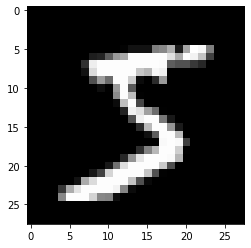

In [7]:
from matplotlib import pyplot as plt 
plt.imshow(x_train[0].reshape((28,28)),cmap="gray")
print(x_train.shape)

In [9]:
import torch 
# 对列表中的每一个对象应用torch.tensor()方法
x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))

n,c = x_train.shape 
# x_train,x_train.shape,y_train.min(),y_train.max()


<ipython-input-9-bbd3d37055e8>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))


In [25]:
# 从零开始构建神经网络。
# pytorch中的_尾随操作，表示原地执行，修改原对象，而不是返回一份copy
import math 
weights = torch.randn(784,10)/math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10,requires_grad=True)

# 使用log softmax方法，并添加到第二列
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def softmax(x):
    return x.exp()/(x.exp().sum(-1))

test_x = torch.tensor([1,2,3,4])
# print(log_softmax(test_x))
test_x = torch.tensor([1,2,3,4])
# print(softmax(test_x))

# 定义了一个简单的一维线性模型
def model(xb):
    return log_softmax(xb @ weights +bias )

# 使用模型进行预测
bs = 64 
xb = x_train[0:bs]
print(xb.shape)
preds = model(xb)
print(preds.shape)
print(preds[0])

# 定义损失函数
def loss_func(input,target):
    return -input[range(target.shape[0]),target].mean()

yb = y_train[0:bs]


def accuracy(out,yb):
    preds = torch.argmax(out,dim=1)
    return (preds==yb).float().mean()

print(accuracy(preds,yb ))

lr = 0.5
epochs = 2 
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

print(loss_func(model(xb),yb),accuracy(model(xb),yb))

torch.Size([64, 784])
torch.Size([64, 10])
tensor([-2.0201, -2.3565, -2.5740, -2.7446, -1.8785, -1.9676, -2.3419, -2.5541,
        -2.3145, -2.7065], grad_fn=<SelectBackward>)
tensor(0.1562)
tensor(0.0827, grad_fn=<NegBackward>) tensor(1.)


In [ ]:
# 使用torch.nn.functional

In [ ]:
# 使用CNN
from torch import  nn 
from torch import optim 
class mnist_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1)
        self.conv2 = nn.Conv2d(16,16.kernel_size=3,stride=2,padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1

model = mnist_cnn()
opt = optim.SGD(model.parameters(),lr=lr,momentum=0.9)
fit(epochs,model,loss_func,opt,train_dl,valid_dl)